# 2c Data Analysis

## Setup

In [ ]:
pip install -r requirements.txt

In [431]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
rng = np.random.default_rng()
pd.set_option('mode.copy_on_write', True)
plt.style.use('fivethirtyeight')

# Colorblind-friendly colors
global_colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

# read the data
df = pd.read_excel('2c Data.xlsx')

# check the data
df.head()

# hard variables
whitehchapelCapacity = 62000
bikeLaneCapacity = 12000
busLaneCapacity = 5000
pedestrianCapacity = 15000
carLaneCapacity = 1500
tramLaneCapacity = 18000

In [434]:
df_out = df[df['ID2'].str.contains('OUT')]
df_lis = df[~df['ID2'].str.contains('OUT')]

df_out_yes = df_out[df_out['health'].str.contains('Yes')]
df_out_no = df_out[df_out['health'].str.contains('No')]
df_lis_yes = df_lis[df_lis['health'].str.contains('Yes')]
df_lis_no = df_lis[df_lis['health'].str.contains('No')]


## Headline

### Ethnicity

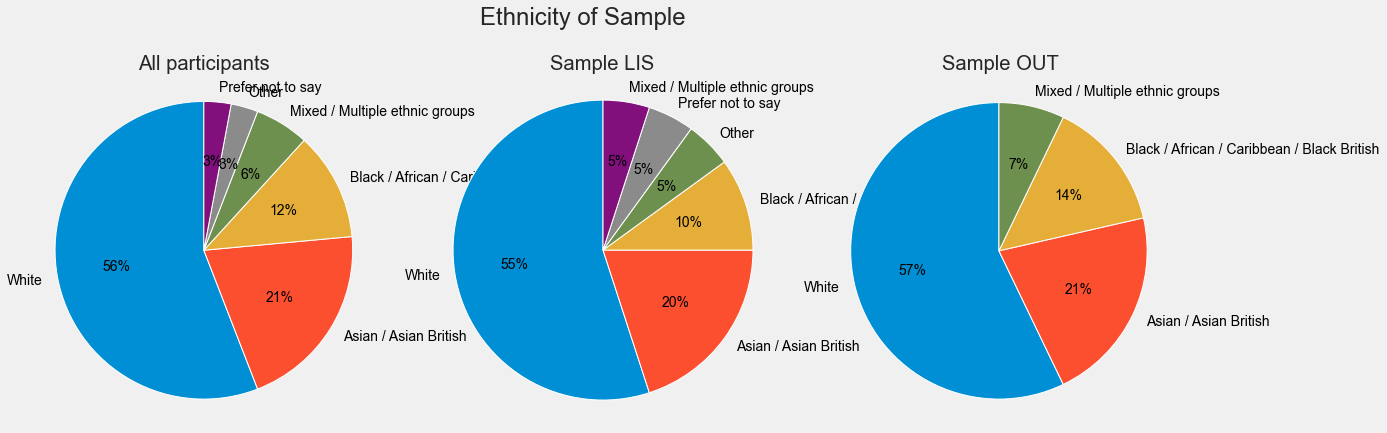

In [352]:
# Create pie chart for all data
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].pie(df.iloc[:, 11].value_counts(), labels=df.iloc[:, 11].value_counts().index, autopct='%.0f%%', textprops={'color': 'black'}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('All participants')
axs[0].axis('equal')

# Group data by 'sample'
groups = df.groupby('sample')

# Create pie charts for each group
for i, (name, group) in enumerate(groups):
    axs[i+1].pie(group.iloc[:, 11].value_counts(), labels=group.iloc[:, 11].value_counts().index, autopct='%.0f%%', textprops={'color': 'black'}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
    axs[i+1].set_title(f'Sample {name}')
    axs[i+1].axis('equal')

# Create central title with vertical space
fig.suptitle('Ethnicity of Sample', fontsize=24, y=1.04)

# Create legend
#fig.legend(df.iloc[:, 11].value_counts().index, loc='center', bbox_to_anchor=(0.5, 0.1), ncol=6)

# Display plot
plt.show()

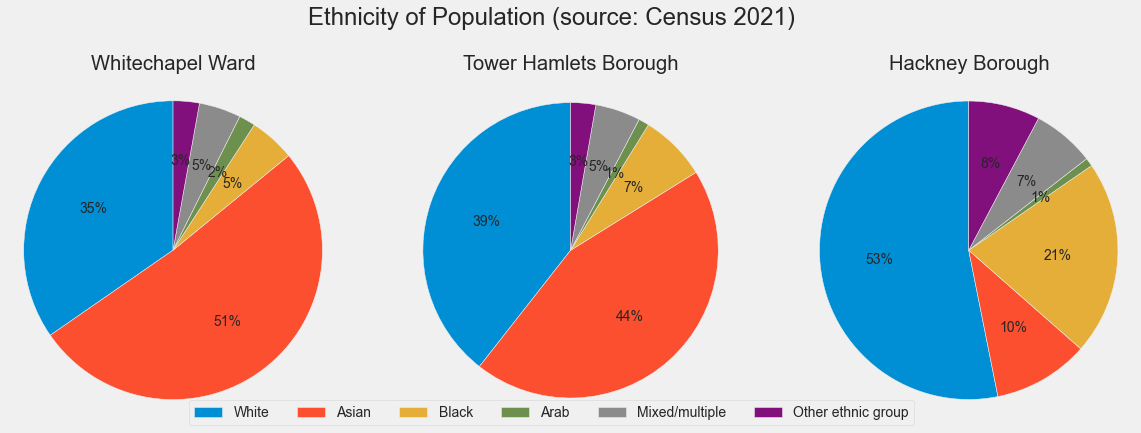

In [353]:
# Create DataFrame for Whitechapel Ward
data1 = pd.DataFrame({
    '': ['White', 'Asian', 'Black', 'Arab', 'Mixed/multiple', 'Other ethnic group'],
    'count': [6527, 9659, 930, 337, 854, 534]
})

# Create DataFrame for Tower Hamlets Borough
data2 = pd.DataFrame({
    '': ['White', 'Asian', 'Black', 'Arab', 'Mixed/multiple', 'Other ethnic group'],
    'count': [122250, 137838, 22687, 3587, 15320, 8500]
})

# Create DataFrame for Hackney Borough
data3 = pd.DataFrame({
    '': ['White', 'Asian', 'Black', 'Arab', 'Mixed/multiple', 'Other ethnic group'],
    'count': [137709, 26885, 54645, 2342, 17487, 20079]
})

# Create figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create pie chart for Whitechapel Ward
axs[0].pie(data1['count'], labels=None, autopct='%1.f%%', startangle=90)
axs[0].set_title('Whitechapel Ward')
axs[0].axis('equal')

# Create pie chart for Tower Hamlets Borough
axs[1].pie(data2['count'], labels=None, autopct='%1.f%%', startangle=90)
axs[1].set_title('Tower Hamlets Borough')
axs[1].axis('equal')

# Create pie chart for Hackney Borough
axs[2].pie(data3['count'], labels=None, autopct='%1.f%%', startangle=90)
axs[2].set_title('Hackney Borough')
axs[2].axis('equal')

# Create central title with vertical space
fig.suptitle('Ethnicity of Population (source: Census 2021)', fontsize=24, y=1.04)

# Create legend
fig.legend(data1[''], loc='center', bbox_to_anchor=(0.5, 0.1), ncol=6)

# Display plot
plt.show()

### Age

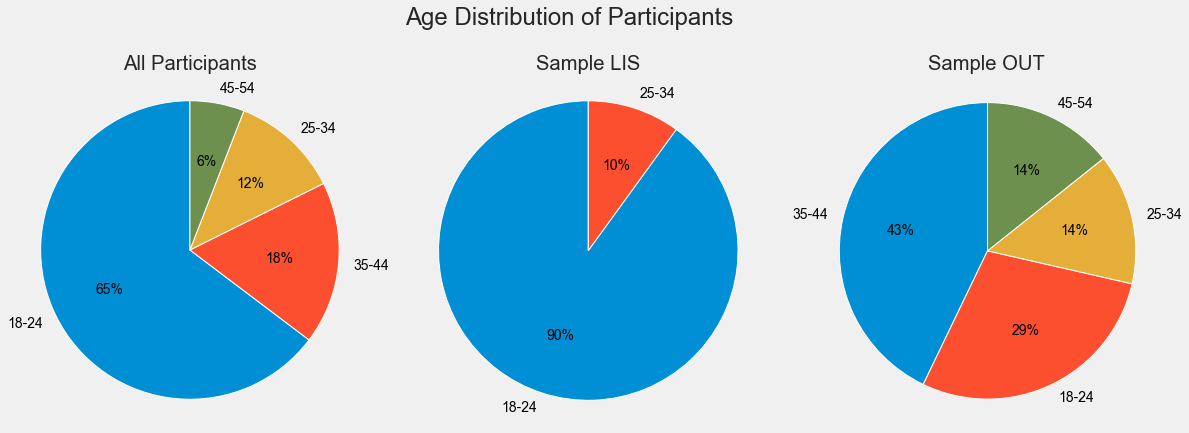

In [354]:
# Create figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create pie chart for all participants
axs[0].pie(df['age'].value_counts(), labels=df['age'].value_counts().index, autopct='%.0f%%', textprops={'color': 'black'}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('All Participants')
axs[0].axis('equal')

# Group data by 'sample'
groups = df.groupby('sample')

# Create pie chart for each group
for i, (name, group) in enumerate(groups):
    axs[i+1].pie(group['age'].value_counts(), labels=group['age'].value_counts().index, autopct='%.0f%%', textprops={'color': 'black'}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
    axs[i+1].set_title(f'Sample {name}')
    axs[i+1].axis('equal')

# Create central title with vertical space
fig.suptitle('Age Distribution of Participants', fontsize=24, y=1.04)

# Display plot
plt.show()

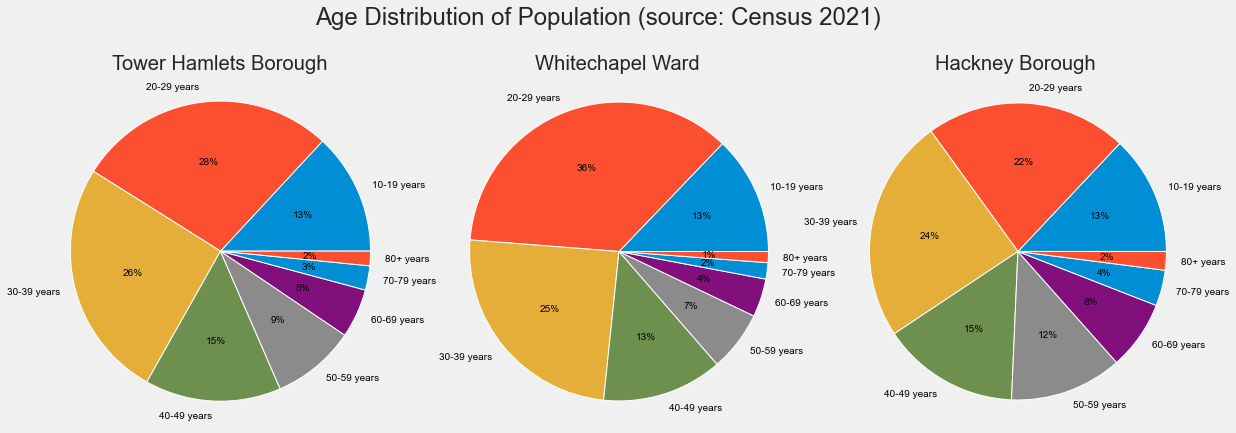

In [355]:
# Define data
labels = ['10-19 years', '20-29 years', '30-39 years', '40-49 years', '50-59 years', '60-69 years', '70-79 years', '80+ years']
sizes1 = [35803, 76471, 70467, 40100, 24686, 14442, 7137, 4274]
sizes2 = [2158, 6043, 4134, 2193, 1096, 695, 297, 201]
sizes3 = [29543, 50125, 55558, 34101, 27916, 17120, 8875, 4614]

# Create figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create pie chart for each dataset
axs[0].pie(sizes1, labels=labels, autopct='%.0f%%', textprops={'color': 'black', 'fontsize': 10}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=0)
axs[0].set_title('Tower Hamlets Borough')
axs[0].axis('equal')

axs[1].pie(sizes2, labels=labels, autopct='%.0f%%', textprops={'color': 'black', 'fontsize': 10}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=0)
axs[1].set_title('Whitechapel Ward')
axs[1].axis('equal')

axs[2].pie(sizes3, labels=labels, autopct='%.0f%%', textprops={'color': 'black', 'fontsize': 10}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=0)
axs[2].set_title('Hackney Borough')
axs[2].axis('equal')

# Create central title with vertical space
fig.suptitle('Age Distribution of Population (source: Census 2021)', fontsize=24, y=1.04)

# Display plot
plt.show()

### Gender

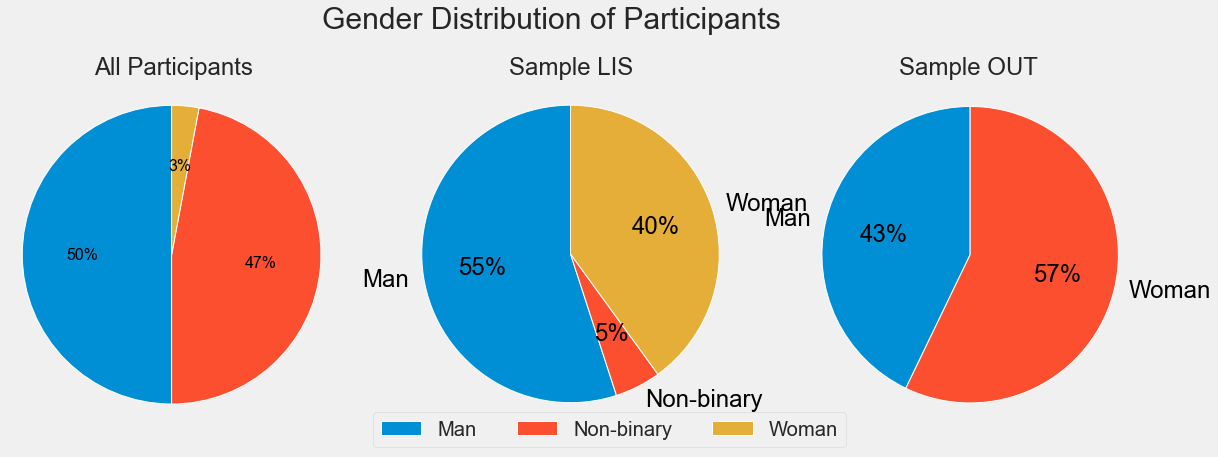

In [359]:
# Define data
labels = ['Man', 'Non-binary', 'Woman']
sizes_all = df['gender'].value_counts().values

# Create figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create pie chart for all participants
axs[0].pie(sizes_all, labels=None, autopct='%.0f%%', textprops={'color': 'black', 'fontsize': 16}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('All Participants', fontsize=24)
axs[0].axis('equal')

groups = df.groupby('sample')

# Create pie chart for each group
for i, (name, group) in enumerate(groups):
    groupSorted = group['gender'].value_counts().sort_index()
    axs[i+1].pie(groupSorted, labels=groupSorted.index, autopct='%.0f%%', textprops={'color': 'black', 'fontsize': 24}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
    axs[i+1].set_title(f'Sample {name}', fontsize=24)
    axs[i+1].axis('equal')

# Create central title with vertical space
fig.suptitle('Gender Distribution of Participants', fontsize=30, y=1.05)

# Create legend
fig.legend(labels, loc='lower center', ncol=3, fontsize='x-large')

# Display plot
plt.show()

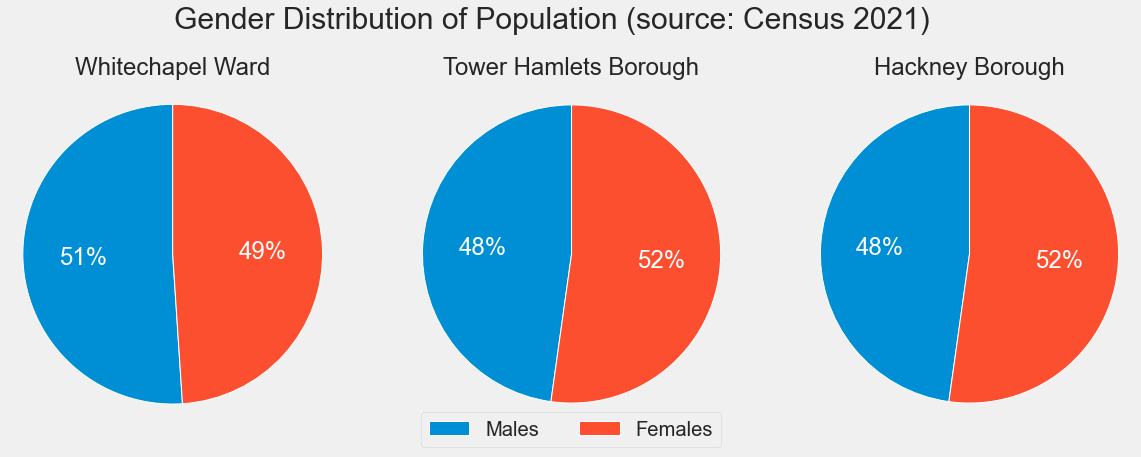

In [360]:
# Define data
labels = ['Males', 'Females']
sizes1 = [9612, 9221]
sizes2 = [123842, 135303]
sizes3 = [123842, 135303]

# Create figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create pie chart for each dataset
axs[0].pie(sizes1, labels=None, autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 24}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('Whitechapel Ward', fontsize=24)
axs[0].axis('equal')

axs[1].pie(sizes2, labels=None, autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 24}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[1].set_title('Tower Hamlets Borough', fontsize=24)
axs[1].axis('equal')

axs[2].pie(sizes3, labels=None, autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 24}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[2].set_title('Hackney Borough', fontsize=24)
axs[2].axis('equal')

# Create central title with vertical space
fig.suptitle('Gender Distribution of Population (source: Census 2021)', fontsize=30, y=1.05)

# Create legend
fig.legend(labels, loc='lower center', ncol=2, fontsize='x-large')

# Display plot
plt.show()

### How often do you drive?

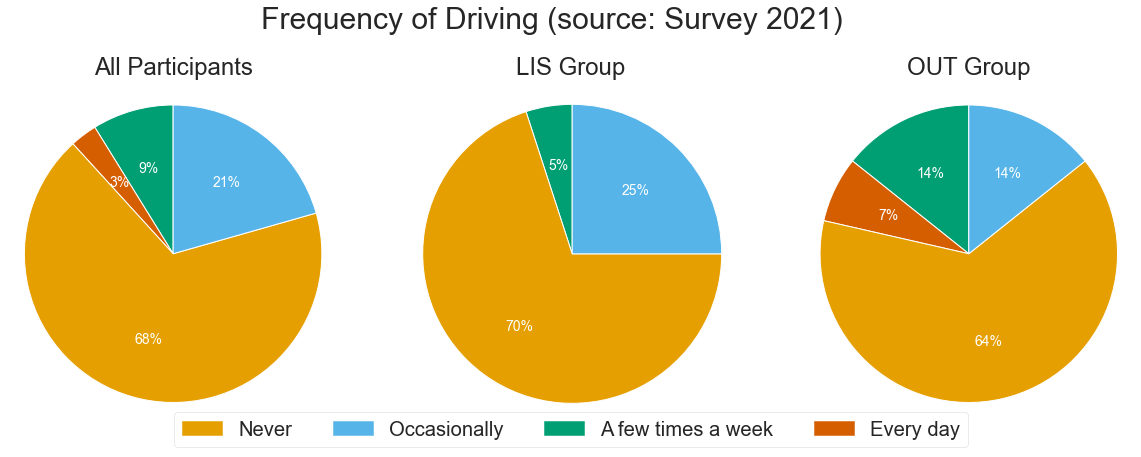

In [405]:
# Define data
labels = ['Never', 'Occasionally', 'A few times a week', 'Every day']
sizes_all = df['drive_freq'].value_counts().sort_index().values
sizes_lis = df[df['sample'] == 'LIS']['drive_freq'].value_counts().sort_index().values
sizes_out = df[df['sample'] == 'OUT']['drive_freq'].value_counts().sort_index().values

# Define color map
colors = {'Never': global_colors[1], 'Occasionally': global_colors[2], 'A few times a week': global_colors[3], 'Every day': global_colors[4]}

# Create figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.patch.set_facecolor('white')  # Set background color of figure to white

# Create pie chart for all participants
axs[0].pie(sizes_all, colors=[colors[x] for x in df['drive_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('All Participants', fontsize=24)
axs[0].axis('equal')

# Create pie chart for LIS group
axs[1].pie(sizes_lis, colors=[colors[x] for x in df[df['sample'] == 'LIS']['drive_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[1].set_title('LIS Group', fontsize=24)
axs[1].axis('equal')

# Create pie chart for OUT group
axs[2].pie(sizes_out, colors=[colors[x] for x in df[df['sample'] == 'OUT']['drive_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[2].set_title('OUT Group', fontsize=24)
axs[2].axis('equal')

# Create central title with vertical space
fig.suptitle('Frequency of Driving (source: Survey 2021)', fontsize=30, y=1.05)

# Create legend
patches = [mpatches.Patch(color=colors[x], label=x) for x in colors]
legend = fig.legend(handles=patches, loc='lower center', ncol=4, fontsize='x-large')
legend.get_frame().set_facecolor('white')  # Set background color of legend to white

# Display plot
plt.show()

### How often do you take public transport?

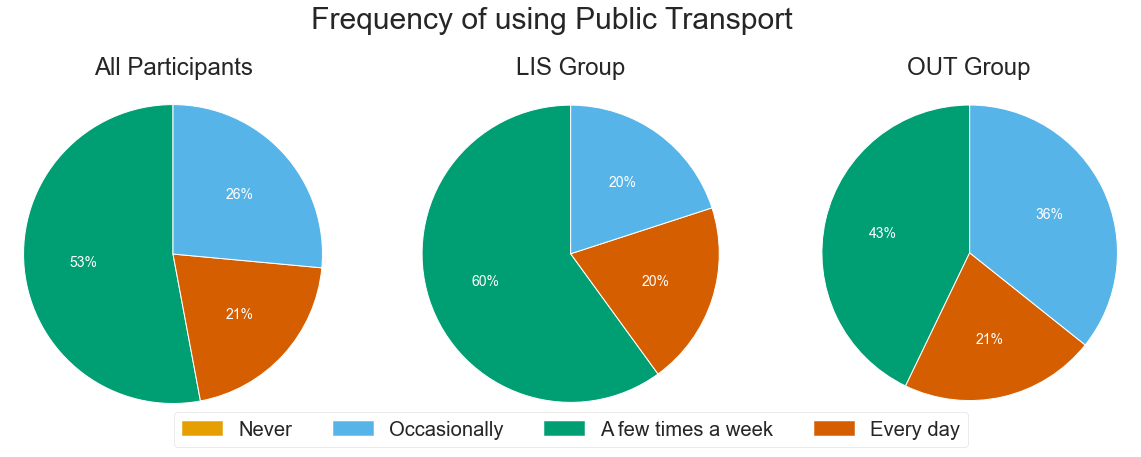

In [415]:
# Define data
labels = ['Never', 'Occasionally', 'A few times a week', 'Every day']
sizes_all = df['public_transport_freq'].value_counts().sort_index().values
sizes_lis = df[df['sample'] == 'LIS']['public_transport_freq'].value_counts().sort_index().values
sizes_out = df[df['sample'] == 'OUT']['public_transport_freq'].value_counts().sort_index().values

# Define color map
colors = {'Never': global_colors[1], 'Occasionally': global_colors[2], 'A few times a week': global_colors[3], 'Every day': global_colors[4]}

# Create figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.patch.set_facecolor('white')  # Set background color of figure to white

# Create pie chart for all participants
axs[0].pie(sizes_all, colors=[colors[x] for x in df['public_transport_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('All Participants', fontsize=24)
axs[0].axis('equal')

# Create pie chart for LIS group
axs[1].pie(sizes_lis, colors=[colors[x] for x in df[df['sample'] == 'LIS']['public_transport_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[1].set_title('LIS Group', fontsize=24)
axs[1].axis('equal')

# Create pie chart for OUT group
axs[2].pie(sizes_out, colors=[colors[x] for x in df[df['sample'] == 'OUT']['public_transport_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[2].set_title('OUT Group', fontsize=24)
axs[2].axis('equal')

# Create central title with vertical space
fig.suptitle('Frequency of using Public Transport', fontsize=30, y=1.05)

# Create legend
patches = [mpatches.Patch(color=colors[x], label=x) for x in colors]
legend = fig.legend(handles=patches, loc='lower center', ncol=4, fontsize='x-large')
legend.get_frame().set_facecolor('white')  # Set background color of legend to white

# Display plot
plt.show()

### How often do you walk or wheel (use a wheel chair)?

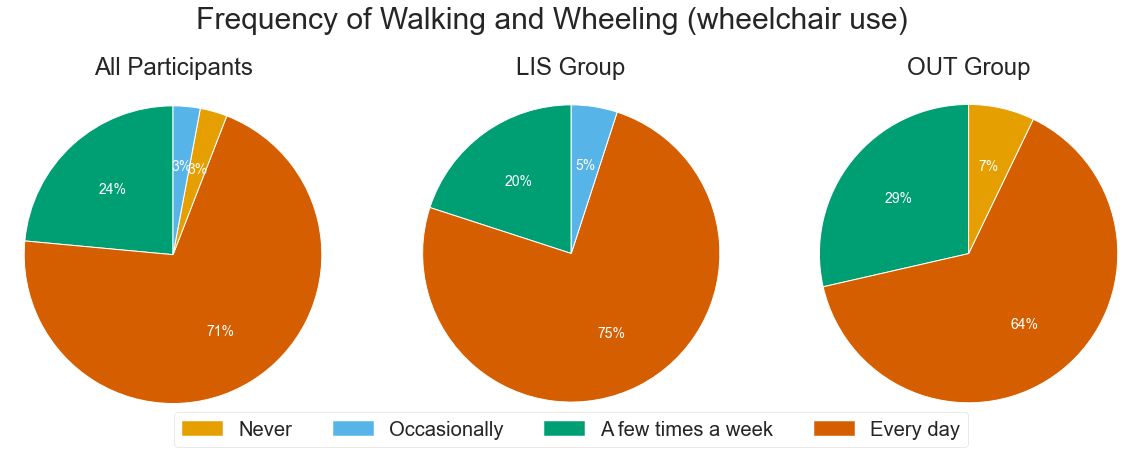

In [418]:
# Define data
labels = ['Never', 'Occasionally', 'A few times a week', 'Every day']
sizes_all = df['walk_wheel_freq'].value_counts().sort_index().values
sizes_lis = df[df['sample'] == 'LIS']['walk_wheel_freq'].value_counts().sort_index().values
sizes_out = df[df['sample'] == 'OUT']['walk_wheel_freq'].value_counts().sort_index().values

# Define color map
colors = {'Never': global_colors[1], 'Occasionally': global_colors[2], 'A few times a week': global_colors[3], 'Every day': global_colors[4]}

# Create figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.patch.set_facecolor('white')  # Set background color of figure to white

# Create pie chart for all participants
axs[0].pie(sizes_all, colors=[colors[x] for x in df['walk_wheel_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('All Participants', fontsize=24)
axs[0].axis('equal')

# Create pie chart for LIS group
axs[1].pie(sizes_lis, colors=[colors[x] for x in df[df['sample'] == 'LIS']['walk_wheel_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[1].set_title('LIS Group', fontsize=24)
axs[1].axis('equal')

# Create pie chart for OUT group
axs[2].pie(sizes_out, colors=[colors[x] for x in df[df['sample'] == 'OUT']['walk_wheel_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[2].set_title('OUT Group', fontsize=24)
axs[2].axis('equal')

# Create central title with vertical space
fig.suptitle('Frequency of Walking and Wheeling (wheelchair use)', fontsize=30, y=1.05)

# Create legend
patches = [mpatches.Patch(color=colors[x], label=x) for x in colors]
legend = fig.legend(handles=patches, loc='lower center', ncol=4, fontsize='x-large')
legend.get_frame().set_facecolor('white')  # Set background color of legend to white

# Display plot
plt.show()

### How often do you cycle or scoot?

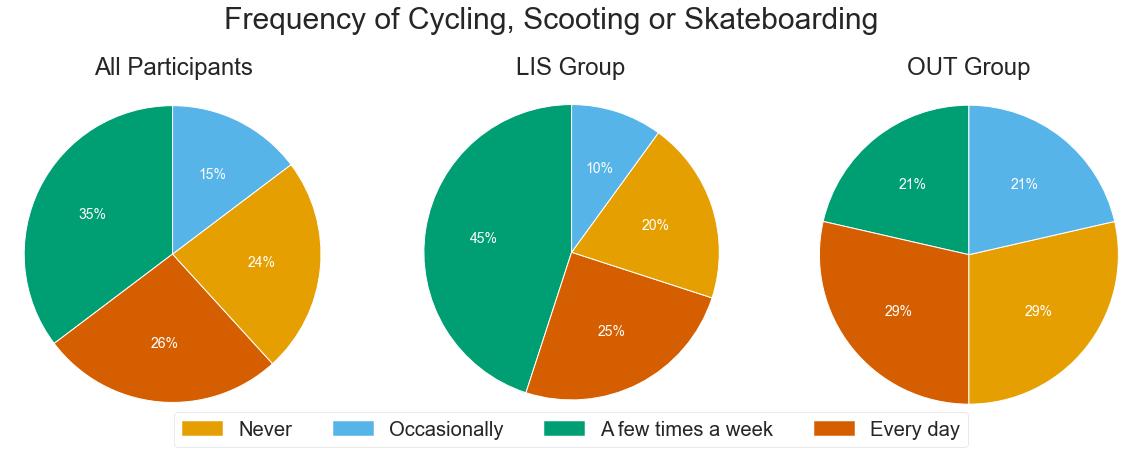

In [420]:
# Define data
labels = ['Never', 'Occasionally', 'A few times a week', 'Every day']
sizes_all = df['cycle_scoot_freq'].value_counts().sort_index().values
sizes_lis = df[df['sample'] == 'LIS']['cycle_scoot_freq'].value_counts().sort_index().values
sizes_out = df[df['sample'] == 'OUT']['cycle_scoot_freq'].value_counts().sort_index().values

# Define color map
colors = {'Never': global_colors[1], 'Occasionally': global_colors[2], 'A few times a week': global_colors[3], 'Every day': global_colors[4]}

# Create figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.patch.set_facecolor('white')  # Set background color of figure to white

# Create pie chart for all participants
axs[0].pie(sizes_all, colors=[colors[x] for x in df['cycle_scoot_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('All Participants', fontsize=24)
axs[0].axis('equal')

# Create pie chart for LIS group
axs[1].pie(sizes_lis, colors=[colors[x] for x in df[df['sample'] == 'LIS']['cycle_scoot_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[1].set_title('LIS Group', fontsize=24)
axs[1].axis('equal')

# Create pie chart for OUT group
axs[2].pie(sizes_out, colors=[colors[x] for x in df[df['sample'] == 'OUT']['cycle_scoot_freq'].value_counts().sort_index().index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[2].set_title('OUT Group', fontsize=24)
axs[2].axis('equal')

# Create central title with vertical space
fig.suptitle('Frequency of Cycling, Scooting or Skateboarding', fontsize=30, y=1.05)

# Create legend
patches = [mpatches.Patch(color=colors[x], label=x) for x in colors]
legend = fig.legend(handles=patches, loc='lower center', ncol=4, fontsize='x-large')
legend.get_frame().set_facecolor('white')  # Set background color of legend to white

# Display plot
plt.show()

### How do you usually travel to work?

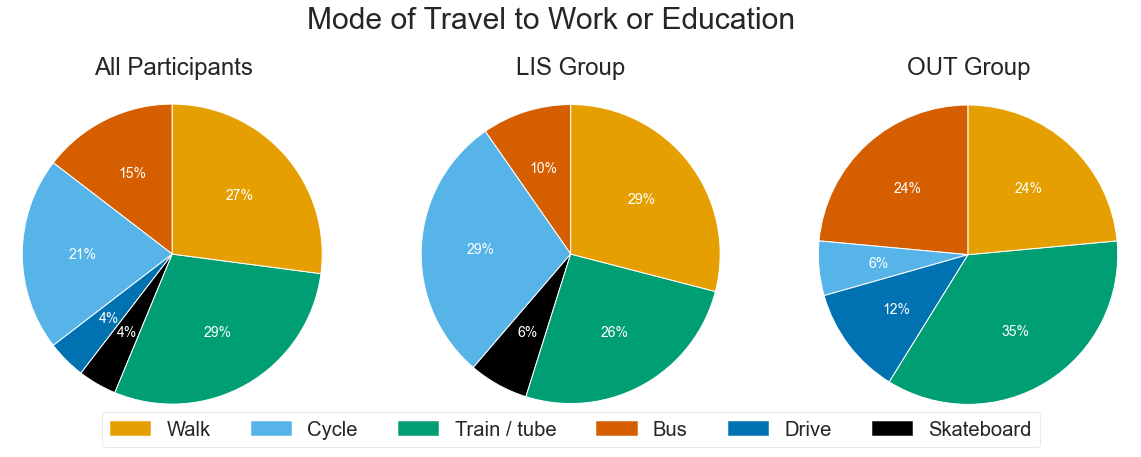

In [441]:
# get the communte_mode column
commute_mode = df['commute_mode'].fillna('')

# get the value counts for each commute mode by splitting the string at semi-colons and spliting by sample group
commute_mode_counts = pd.DataFrame(commute_mode.str.split(';').tolist()).stack().value_counts().sort_index()
commute_mode_counts = commute_mode_counts[commute_mode_counts.index != '']  # exclude empty strings
commute_mode_counts_lis = pd.DataFrame(df[df['sample'] == 'LIS']['commute_mode'].fillna('').str.split(';').tolist()).stack().value_counts().sort_index()
commute_mode_counts_lis = commute_mode_counts_lis[commute_mode_counts_lis.index != '']  # exclude empty strings
commute_mode_counts_out = pd.DataFrame(df[df['sample'] == 'OUT']['commute_mode'].fillna('').str.split(';').tolist()).stack().value_counts().sort_index()
commute_mode_counts_out = commute_mode_counts_out[commute_mode_counts_out.index != '']  # exclude empty strings

# Define data
labels = ['Walk', 'Drive', 'Train / Tube', 'Cycle', 'Bus', 'Skateboard']
sizes_all = commute_mode_counts.values
sizes_lis = commute_mode_counts_lis.values
sizes_out = commute_mode_counts_out.values

# Define color map
colors = {'Walk': global_colors[1], 'Cycle': global_colors[2], 'Train / tube': global_colors[3], 'Bus': global_colors[4], 'Drive': global_colors[5], 'Skateboard': global_colors[0]}

# Create figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.patch.set_facecolor('white')  # Set background color of figure to white

# Create pie chart for all participants
axs[0].pie(sizes_all, colors=[colors[x] for x in commute_mode_counts.index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[0].set_title('All Participants', fontsize=24)
axs[0].axis('equal')

# Create pie chart for LIS group
axs[1].pie(sizes_lis, colors=[colors[x] for x in commute_mode_counts_lis.index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[1].set_title('LIS Group', fontsize=24)
axs[1].axis('equal')

# Create pie chart for OUT group
axs[2].pie(sizes_out, colors=[colors[x] for x in commute_mode_counts_out.index], autopct='%.0f%%', textprops={'color': 'white', 'fontsize': 14}, wedgeprops={'linewidth': 1, 'edgecolor': 'white'}, startangle=90)
axs[2].set_title('OUT Group', fontsize=24)
axs[2].axis('equal')

# Create central title with vertical space
fig.suptitle('Mode of Travel to Work or Education', fontsize=30, y=1.05)

# Create legend
patches = [mpatches.Patch(color=colors[x], label=x) for x in colors]
legend = fig.legend(handles=patches, loc='lower center', ncol=6, fontsize='x-large')
legend.get_frame().set_facecolor('white')  # Set background color of legend to white

# Display plot
plt.show()

## Comparative analysis of outside of LIS groups vs inside LIS groups

In [364]:
print('Mean of capacity for OUT Yes: ', df_out_yes['capacity'].mean())
print('Median of capacity for OUT Yes: ', df_out_yes['capacity'].median())
print("\n")
print('Mean of capacity for OUT No: ', df_out_no['capacity'].mean())
print('Median of capacity for OUT No: ', df_out_no['capacity'].median())
print("\n")
print('Mean of capacity for LIS Yes: ', df_lis_yes['capacity'].mean())
print('Median of capacity for LIS Yes: ', df_lis_yes['capacity'].median())
print("\n")
print('Mean of capacity for LIS No: ', df_lis_no['capacity'].mean())
print('Median of capacity for LIS No: ', df_lis_no['capacity'].median())
print("\n")

print('Mean of capacity for OUT: ', df_out['capacity'].mean())
print('Median of capacity for OUT: ', df_out['capacity'].median())
print('Mean of capacity for LIS: ', df_lis['capacity'].mean())
print('Median of capacity for LIS: ', df_lis['capacity'].median())
print("\n")
print('Mean of capacity for whole dataframe: ', df['capacity'].mean())
print('Median of capacity for whole dataframe: ', df['capacity'].median())


Mean of capacity for OUT Yes:  61500.0
Median of capacity for OUT Yes:  62000.0


Mean of capacity for OUT No:  66714.28571428571
Median of capacity for OUT No:  63000.0


Mean of capacity for LIS Yes:  78900.0
Median of capacity for LIS Yes:  73500.0


Mean of capacity for LIS No:  70900.0
Median of capacity for LIS No:  67000.0


Mean of capacity for OUT:  64107.142857142855
Median of capacity for OUT:  62500.0
Mean of capacity for LIS:  74900.0
Median of capacity for LIS:  70000.0


Mean of capacity for whole dataframe:  70455.88235294117
Median of capacity for whole dataframe:  66500.0


<AxesSubplot:xlabel='capacity', ylabel='group'>

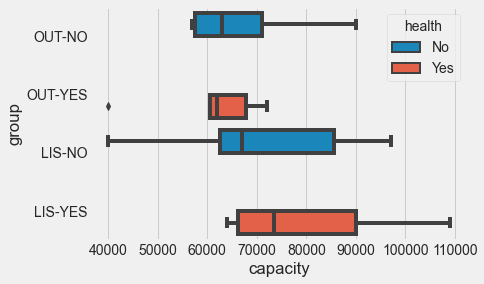

In [365]:
sns.boxplot(data=df, x="capacity", y="group", hue="health")

<AxesSubplot:xlabel='capacity', ylabel='sample'>

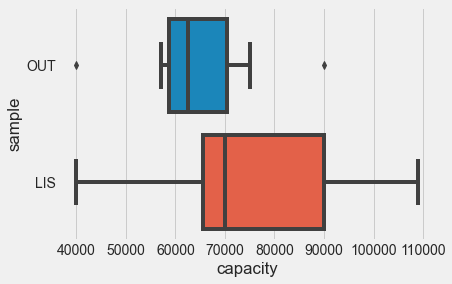

In [366]:
sns.boxplot(data=df, x="capacity", y="sample")

<AxesSubplot:xlabel='capacity', ylabel='group'>

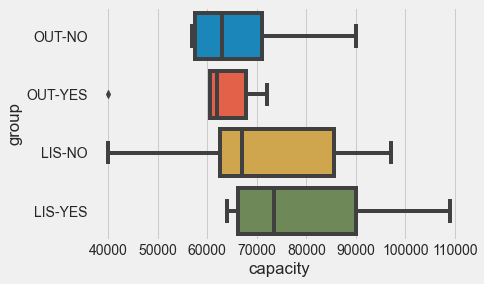

In [367]:
sns.boxplot(data=df, x="capacity", y="group")

<AxesSubplot:xlabel='Trees number', ylabel='group'>

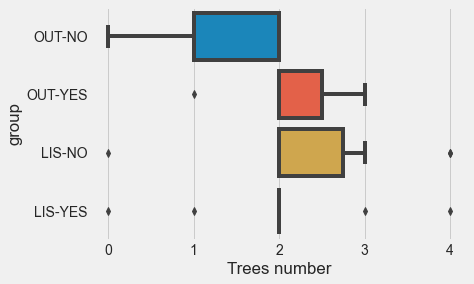

In [368]:
sns.boxplot(data=df, x="Trees number", y="group")

<AxesSubplot:xlabel='Total veg number', ylabel='group'>

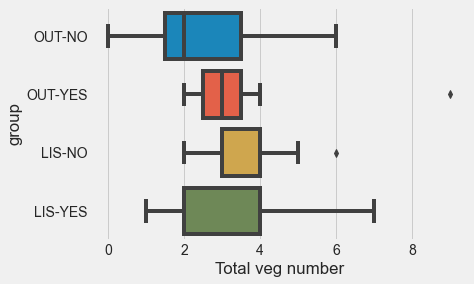

In [369]:
df['Total veg number'] = df['Trees number'] + df['Other veg number']

sns.boxplot(data=df, x="Total veg number", y="group")

<AxesSubplot:xlabel='Bike lane number (or scooter)', ylabel='group'>

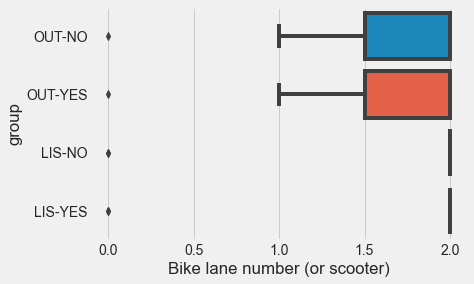

In [370]:
sns.boxplot(data=df, x="Bike lane number (or scooter)", y="group")

<AxesSubplot:xlabel='Bike lane number (or scooter)', ylabel='group'>

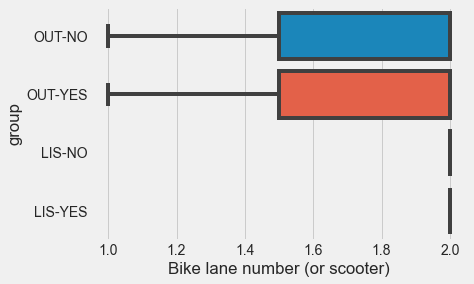

In [371]:
sns.boxplot(data=df, x="Bike lane number (or scooter)", y="group", showfliers=False)

<AxesSubplot:xlabel='Bike lane width', ylabel='group'>

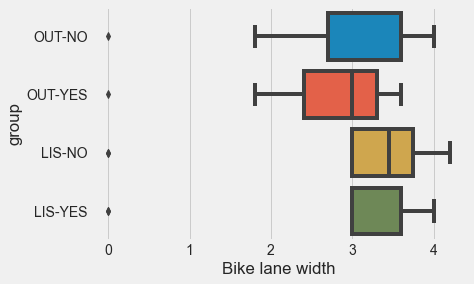

In [372]:
sns.boxplot(data=df, x="Bike lane width", y="group")

<AxesSubplot:xlabel='Bike lane width', ylabel='group'>

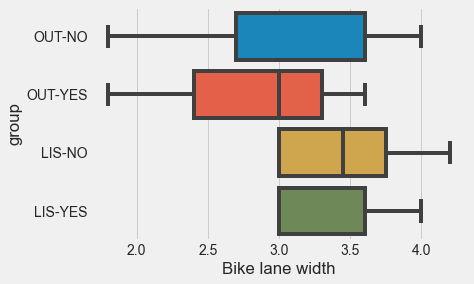

In [373]:
sns.boxplot(data=df, x="Bike lane width", y="group", showfliers = False)

# Adjusting for difference (calibration error)

In [374]:
# calcluate the mean of the capacity column for the LIS and OUT groups
df.groupby('group')['capacity'].mean(), df.groupby('sample')['capacity'].mean()

(group
 LIS-NO     70900.000000
 LIS-YES    78900.000000
 OUT-NO     66714.285714
 OUT-YES    61500.000000
 Name: capacity, dtype: float64,
 sample
 LIS    74900.000000
 OUT    64107.142857
 Name: capacity, dtype: float64)

In [375]:
# for each participant in df, calculate the difference between their capacity and the mean capacity of their group, and add this to a new column, 'capacity diff'
df['capacity diff'] = df['capacity'] - df.groupby('group')['capacity'].transform('mean')

In [376]:
# display the df with th group, capacity and capacity diff columns
df[['group', 'capacity', 'capacity diff']]

,group,capacity,capacity diff
0,OUT-NO,57000,-9714.285714
1,OUT-YES,64000,2500.000000
2,OUT-NO,90000,23285.714286
3,OUT-YES,60500,-1000.000000
4,OUT-NO,67000,285.714286
5,LIS-NO,93000,22100.000000
6,LIS-YES,75000,-3900.000000
7,LIS-NO,62000,-8900.000000
8,LIS-YES,67000,-11900.000000
9,LIS-NO,57000,-13900.000000


<AxesSubplot:xlabel='capacity diff', ylabel='group'>

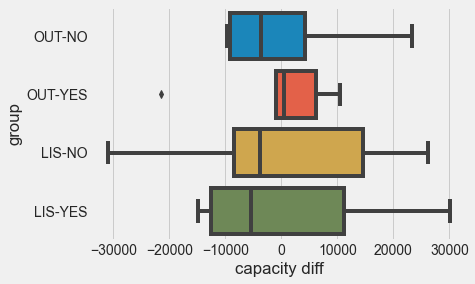

In [377]:
# plot a boxplot of the capacity diff column, grouped by group
sns.boxplot(data=df, x="capacity diff", y="group")

In [378]:
# for each participant in df, calculate the difference between their capacity and the mean capacity of their sample, and add this to a new column, 'capacity diff sample'
df['capacity diff sample'] = df['capacity'] - df.groupby('sample')['capacity'].transform('mean')

In [379]:
# display the df with th group, capacity, capacity diff and capacity diff sample columns
df[['group', 'capacity', 'capacity diff', 'capacity diff sample']]

,group,capacity,capacity diff,capacity diff sample
0,OUT-NO,57000,-9714.285714,-7107.142857
1,OUT-YES,64000,2500.000000,-107.142857
2,OUT-NO,90000,23285.714286,25892.857143
3,OUT-YES,60500,-1000.000000,-3607.142857
4,OUT-NO,67000,285.714286,2892.857143
5,LIS-NO,93000,22100.000000,18100.000000
6,LIS-YES,75000,-3900.000000,100.000000
7,LIS-NO,62000,-8900.000000,-12900.000000
8,LIS-YES,67000,-11900.000000,-7900.000000
9,LIS-NO,57000,-13900.000000,-17900.000000


<AxesSubplot:xlabel='capacity diff sample', ylabel='group'>

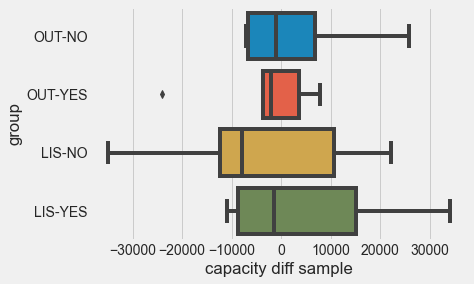

In [380]:
# plot a boxplot of the capacity diff sample column, grouped by group
sns.boxplot(data=df, x="capacity diff sample", y="group")

# Permutation

## Permutation of capactiy of lis and outside groups

In [381]:
lis_capacity = np.array(df_lis['capacity'])
out_capacity = np.array(df_out['capacity'])

n_lis = len(lis_capacity)
n_out = len(out_capacity)

In [382]:
pooled = np.concatenate([lis_capacity, out_capacity])
pooled

array([ 93000,  75000,  62000,  67000,  57000, 109000,  97000,  64000,
        90000,  72000,  64000,  90000,  72000,  66000,  40000,  90000,
        68000,  66000,  66000,  90000,  57000,  64000,  90000,  60500,
        67000,  40000,  58000,  62000,  75000,  72000,  57000,  60500,
        63000,  71500])

In [383]:
shuffled = rng.permutation(pooled)
shuffled

array([ 58000,  64000,  72000,  67000,  60500,  90000,  67000,  57000,
        97000, 109000,  90000,  64000,  63000,  64000,  62000,  90000,
        93000,  90000,  75000,  66000,  62000,  68000,  66000,  40000,
        57000,  72000,  40000,  57000,  75000,  90000,  72000,  71500,
        66000,  60500])

In [384]:
# The first 774 values
fake_lis = shuffled[:20]
# The rest
fake_out = shuffled[20:]
len(fake_out)

14

In [385]:
real_difference = np.mean(lis_capacity) - np.mean(out_capacity)
real_difference

10792.857142857145

In [386]:
fake_difference = np.mean(fake_lis) - np.mean(fake_out)
fake_difference

10853.571428571428

In [387]:
shuffled = rng.permutation(pooled)
fake_difference_2 = np.mean(shuffled[:20]) - np.mean(shuffled[20:])
fake_difference_2

-135.71428571428987

In [388]:
# An array of zeros to store the fake differences
example_diffs = np.zeros(10000)
# Do the shuffle / difference steps 10000 times
for i in np.arange(10000):
    shuffled = rng.permutation(pooled)
    fake_lis = shuffled[:n_lis]
    fake_out = shuffled[n_out:]
    eg_diff = np.mean(fake_out) - np.mean(fake_lis)
    # Collect the results in the results array
    example_diffs[i] = eg_diff

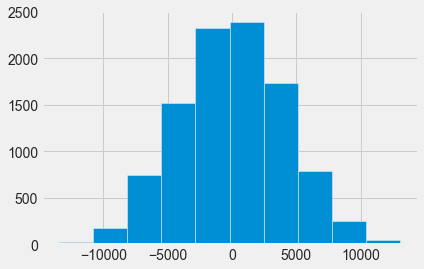

In [389]:
plt.hist(example_diffs);

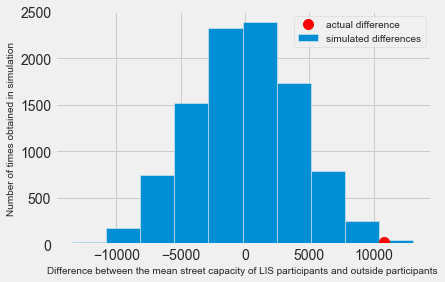

In [390]:
# do not worry about the code below, it just plots the sampling distribution, the actual difference in the mean ages, 
# and adds some labels to the histogram. 
plt.hist(example_diffs, label = 'simulated differences')
fontsize = {'fontsize': 10}
plt.plot(real_difference, 20 , 'o', 
         markersize = 10,color = 'red',
         label = 'actual difference')
plt.xlabel('Difference between the mean street capacity of LIS participants and outside participants', **fontsize)
plt.ylabel('Number of times obtained in simulation', **fontsize)
plt.legend(**fontsize);

So conclusion is that there is probably a real difference between the two groups because the actual difference is very unlikely in the sample of 10000 simulated differences.

In [391]:
are_as_high = example_diffs >= real_difference
n_as_high = np.count_nonzero(are_as_high)
n_as_high

35

In [392]:
proportion = n_as_high / 10000
proportion

0.0035

## Permutation of no vs yes

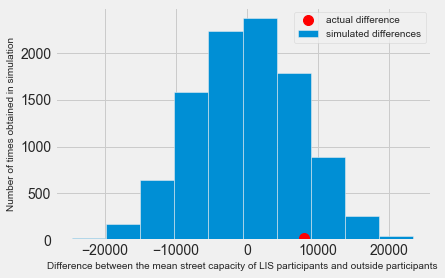

In [393]:
lis_yes_capacity = np.array(df_lis_yes['capacity'])
lis_no_capacity = np.array(df_lis_no['capacity'])

n_lis_yes = len(lis_yes_capacity)
n_lis_no = len(lis_no_capacity)

real_difference = np.mean(lis_yes_capacity) - np.mean(lis_no_capacity)

pooled = np.concatenate([lis_yes_capacity, lis_no_capacity])
shuffled = rng.permutation(pooled)

# An array of zeros to store the fake differences
example_diffs = np.zeros(10000)
# Do the shuffle / difference steps 10000 times
for i in np.arange(10000):
    shuffled = rng.permutation(pooled)
    fake_lis = shuffled[:n_lis_yes]
    fake_out = shuffled[n_lis_no:]
    eg_diff = np.mean(fake_out) - np.mean(fake_lis)
    # Collect the results in the results array
    example_diffs[i] = eg_diff


# do not worry about the code below, it just plots the sampling distribution, the actual difference in the mean ages, 
# and adds some labels to the histogram. 
plt.hist(example_diffs, label = 'simulated differences')
fontsize = {'fontsize': 10}
plt.plot(real_difference, 20 , 'o', 
         markersize = 10,color = 'red',
         label = 'actual difference')
plt.xlabel('Difference between the mean street capacity of LIS participants and outside participants', **fontsize)
plt.ylabel('Number of times obtained in simulation', **fontsize)
plt.legend(**fontsize);

In [394]:
are_as_high = example_diffs >= real_difference
n_as_high = np.count_nonzero(are_as_high)
n_as_high

1505

In [395]:
proportion = n_as_high / 10000
proportion

0.1505

Could be more surprising

## Permutation function

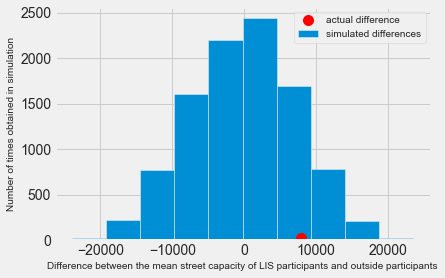

In [396]:
lis_yes_capacity = np.array(df_lis_yes['capacity'])
lis_no_capacity = np.array(df_lis_no['capacity'])

n_lis_yes = len(lis_yes_capacity)
n_lis_no = len(lis_no_capacity)

real_difference = np.mean(lis_yes_capacity) - np.mean(lis_no_capacity)

pooled = np.concatenate([lis_yes_capacity, lis_no_capacity])
shuffled = rng.permutation(pooled)

# An array of zeros to store the fake differences
example_diffs = np.zeros(10000)
# Do the shuffle / difference steps 10000 times
for i in np.arange(10000):
    shuffled = rng.permutation(pooled)
    fake_lis = shuffled[:n_lis_yes]
    fake_out = shuffled[n_lis_no:]
    eg_diff = np.mean(fake_out) - np.mean(fake_lis)
    # Collect the results in the results array
    example_diffs[i] = eg_diff


# do not worry about the code below, it just plots the sampling distribution, the actual difference in the mean ages, 
# and adds some labels to the histogram. 
plt.hist(example_diffs, label = 'simulated differences')
fontsize = {'fontsize': 10}
plt.plot(real_difference, 20 , 'o', 
         markersize = 10,color = 'red',
         label = 'actual difference')
plt.xlabel('Difference between the mean street capacity of LIS participants and outside participants', **fontsize)
plt.ylabel('Number of times obtained in simulation', **fontsize)
plt.legend(**fontsize);



In [397]:
def difference_of_means(table, label, group_label):
    """Takes a DataFrame, a column label, and a group label.
    Returns the mean of the column for the group with the label minus
    the mean of the column for the other group."""
    means_table = table.groupby(group_label).mean()[label]
    return means_table.iloc[1] - means_table.iloc[0]

def one_simulated_difference(table, label, group_label):
    """Takes a DataFrame, a column label, and a group label.
    Returns one simulated difference of means."""
    shuffled_labels = table[group_label].sample(frac=1).reset_index(drop=True)
    shuffled_table = pd.DataFrame({label: table[label], 'Shuffled Label': shuffled_labels})
    return difference_of_means(shuffled_table, label, 'Shuffled Label')

def simulate_null(table, label, group_label, repetitions):
    """Takes a DataFrame, a column label, a group label, and a number of repetitions.
    Returns an array of simulated differences of means."""
    simulated_diffs = np.array([])
    for _ in range(repetitions):
        sim_diff = one_simulated_difference(table, label, group_label)
        simulated_diffs = np.append(simulated_diffs, sim_diff)
    return simulated_diffs

def p_value(table, label, group_label, repetitions):
    """Takes a DataFrame, a column label, a group label, and a number of repetitions.
    Returns a p-value for a hypothesis test comparing the two groups."""
    observed_diff = difference_of_means(table, label, group_label)
    simulated_diffs = simulate_null(table, label, group_label, repetitions)
    return np.count_nonzero(simulated_diffs >= observed_diff) / repetitions

p_value(df, 'capacity', 'group', 10000)

/var/folders/qt/1zhwft1j5dx5rp5_b5rbl__c0000gn/T/ipykernel_17603/3101635524.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_table = table.groupby(group_label).mean()[label]


0.1219

In [398]:
df.groupby('group').mean()['capacity']

/var/folders/qt/1zhwft1j5dx5rp5_b5rbl__c0000gn/T/ipykernel_17603/2799957843.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('group').mean()['capacity']


group
LIS-NO     70900.000000
LIS-YES    78900.000000
OUT-NO     66714.285714
OUT-YES    61500.000000
Name: capacity, dtype: float64

In [399]:
means_table = df.groupby('group').mean()['capacity']
means_table.iloc[1]

/var/folders/qt/1zhwft1j5dx5rp5_b5rbl__c0000gn/T/ipykernel_17603/803234393.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means_table = df.groupby('group').mean()['capacity']


78900.0